In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report, balanced_accuracy_score  # Importing classification_report and balanced_accuracy_score from scikit-learn for evaluating classification models.

np.random.seed(2025)

In [ ]:
class perceptronLinearClassifier:
    def __init__(self, learning_rate=0.01, n_epochs=100):
        """
        Initializes the Perceptron Linear Classifier.

        Args:
            learning_rate (float): The learning rate for updating weights.
            n_epochs (int): The number of epochs to train for.
        """
        self.eta = learning_rate  # Learning rate
        self.n_epochs = n_epochs  # Number of training epochs
        self.b = None  # Weights vector (bias) initialized to None

    def train(self, X, y):
        """
        Trains the Perceptron Linear Classifier.

        Args:
            X (np.ndarray): Input features.
            y (np.ndarray): Target values.
        """
        n_samples, n_features = X.shape  # Dimensions of the input data

        # Initialize weights if not already done (e.g., for incremental training)
        if self.b is None:
            self.b = np.zeros(n_features)  # Initialize weights to zero

        # Ensure y is a numpy array
        y_arr = np.asarray(y)

        for epoch in range(self.n_epochs):  # Iterate through each epoch
            linear_scores = np.dot(X, self.b)  # Calculate linear scores
            predicted_classes_c = np.sign(linear_scores)  # Predict class labels
            misclassified_mask = (y_arr != predicted_classes_c)  # Identify misclassified samples
            if not np.any(misclassified_mask):
                break  # If no samples are misclassified, break the loop
            y_for_update = misclassified_mask * y_arr  # Get the target values for updating weights
            self.b = self.b + self.eta * np.dot(X.T, y_for_update)  # Update the weights
            
        return self

    def predict(self, X):
        """
        Predicts the class labels for new data using the trained model.

        Args:
            X (np.ndarray): Input features.

        Returns:
            np.ndarray: Predicted class labels.
        """
        if self.b is None:
            raise ValueError("Model has not been trained yet. Call train() first.")  # Raise an error if the model hasn't been trained

        # Calculate linear scores: b' * X
        linear_scores = np.dot(X, self.b)
        
        predictions = np.sign(linear_scores)

        # np.sign(0) is 0.
        predictions[predictions == 0] = 1
        return predictions
    
    def fit_predict(self, X, y):
        """
        Trains and predicts the class labels for new data using the trained model.

        Args:
            X (np.ndarray): Input features.
            y (np.ndarray): Target values.

        Returns:
            np.ndarray: Predicted class labels.
        """
        self.train(X, y)
        return self.predict(X)

In [ ]:
# Create two DataFrame objects with normal distributions of x and y coordinates
df1 = pd.DataFrame({'x':np.random.normal(-10, 1, 200),
                    'y': np.random.normal(-10, 1, 200)})

df2 = pd.DataFrame({'x':np.random.normal(10, 1, 200),
                    'y': np.random.normal(10, 1, 200)})

# Create a list of DataFrame objects to be concatenated
frames = [df1, df2]

# Concatenate the DataFrame objects into a single DataFrame
data = pd.concat(frames)

y = np.array([1]*200 + [-1]*200)  # Labels for the two classes

In [ ]:
# Create an instance of the Perceptron class with 2 clusters
perceptron = perceptronLinearClassifier(learning_rate=1, n_epochs=100)

# Fit the model to the data and assign labels to each point in the dataset
labels = perceptron.fit_predict(data, y)

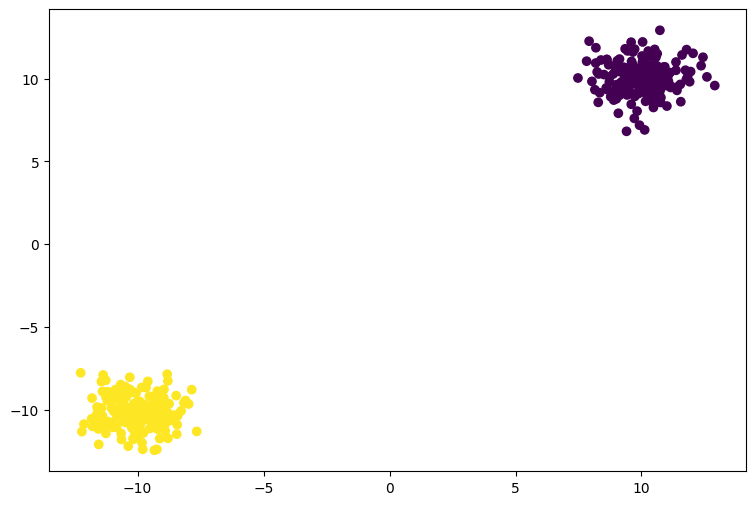

In [ ]:
# Create a scatter plot of x and y data grouped by the perceptron predicted labels
plt.scatter(data['x'], data['y'], c=labels)
plt.show()

In [ ]:
# Parameters for the hyperbola
a, b = 1.0, 1.0
# Create an array of values for the parameter t
t = np.linspace(-3, 3, 100)
# Right branch of hyperbola: x = a * cosh(t), y = b * sinh(t)
x_right = a * np.cosh(t)
# y = b * sinh(t)
y_right = b * np.sinh(t)
# Left branch: mirror of right branch
x_left = -x_right
# y = y_right
y_left = y_right
# Stack both branches
xH = np.vstack([
    np.column_stack([x_left, y_left]),
    np.column_stack([x_right, y_right])
])
# Create y array for hyperbola
yH = np.array([-1]*len(x_left) + [1]*len(x_right))

Vemos que los datos nuevamente se agrupan correctamente. La estrella roja marca el centroide:

In [ ]:
# Create an instance of the perceptron class with 2 clusters
perceptronH = perceptronLinearClassifier(learning_rate=1, n_epochs=100)

# Fit the model to the data and assign labels to each point in the dataset
labelsH = perceptronH.fit_predict(xH, yH)

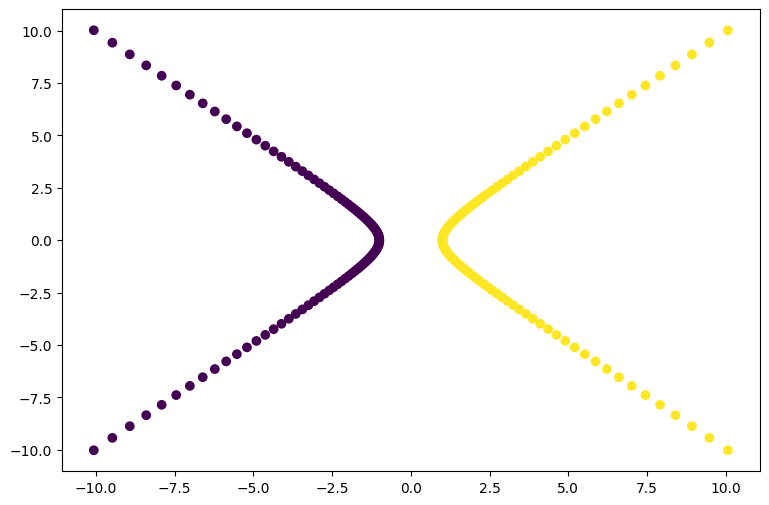

In [ ]:
# Create a scatter plot of x and y data grouped by the perceptron predicted labels
plt.figure(figsize=(9, 6))
plt.scatter(xH.transpose()[0],xH.transpose()[1], c = labelsH.astype(int))
plt.show()